## Evaluate whether the car will be accepted or rejected on the basis of attributes like buying price, maintenance cost, number of doors, person capacity, luggage space and safety features.

##**Attribute Information:**

###*Class Values:*

####unacc, acc, good, vgood

###*Attributes:*

####buying: vhigh, high, med, low.
#####maint: vhigh, high, med, low.
#####doors: 2, 3, 4, 5more.
#####persons: 2, 4, more.
#####lug_boot: small, med, big.
#####safety: low, med, high.

In [1]:
import pandas as pd

In [2]:
cols = ['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names = cols)

In [4]:
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.shape

(1728, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.describe()

,buying,maintenance,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,small,high,unacc
freq,432,432,432,576,576,576,1210


In [8]:
df.isna().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
class          0
dtype: int64

In [9]:
df.columns

Index(['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety',
       'class'],
      dtype='object')

In [10]:
# Let's check the values of the target variable
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

### *As seen above the values are not equally distributed. Hence we would face high biasness towards the 'Unacceptable' value. Thus we can say that this is an imbalanced dataset.*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


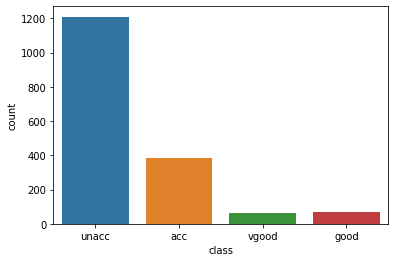

In [11]:
# Visualizing the imbalanced data more clearly
import seaborn as sns

sns.countplot(df['class'])

In [12]:
df.dtypes

buying         object
maintenance    object
doors          object
persons        object
lug_boot       object
safety         object
class          object
dtype: object

#### *Here all the columns are of Object datatype. We'll convert it to Numerical datatype by LabelEncoding it.*

In [13]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [14]:
# LabelEncoding all the data in the columns as all are Ordinal
dfle = df

for i in dfle.columns:
  dfle[i] = le.fit_transform(dfle[i])

In [15]:
dfle.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [16]:
dfle.dtypes

buying         int64
maintenance    int64
doors          int64
persons        int64
lug_boot       int64
safety         int64
class          int64
dtype: object

### *Now we have successfully LabelEncoded the data and converted all the columns to numerical datatype.*

In [17]:
# Importing visualization libraries 
import matplotlib.pyplot as plt

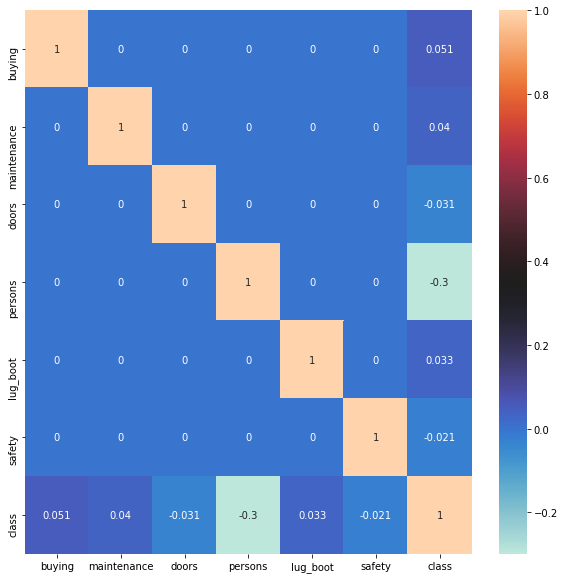

In [18]:
# Finding correlation between all features

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='icefire')

plt.show()

# Available cmap colors:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
# 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
# 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 
# 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
# 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot',
# 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r',
# 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth',
# 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
# 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire',
# 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'ma...


###*Now as all columns are numerical, we will have more insights*

In [19]:
dfle.describe()

,buying,maintenance,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


# Splitting the dataset

In [20]:
X = df.iloc[:, :-1]   # Independant / Features
y = df.iloc[:, -1]    # Dependant / Target

In [21]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # 80% training data 

## Using Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Checking the accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy Score for Logistic:', accuracy_score(y_test, logit.predict(X_test)))

Accuracy Score for Logistic: 0.6589595375722543


## Using Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
# Checking the accuracy score
print('Accuracy Score for NB:', accuracy_score(y_test, nb.predict(X_test)))

Accuracy Score for NB: 0.684971098265896


## Using Neural Network

In [26]:
from sklearn.neural_network import MLPClassifier      # Multi Layer Perceptron

nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [27]:
# Checking the accuracy score
print('Accuracy Score for NN:', accuracy_score(y_test, nn_clf.predict(X_test)))

Accuracy Score for NN: 0.8583815028901735


##*Now saving all the models*

In [28]:
import joblib as jl

In [29]:
logit_model = open('uci_cardata_logitmodel.pkl', 'wb')
jl.dump(logit, logit_model)
logit_model.close()

In [30]:
nb_model = open('uci_cardata_nbmodel.pkl', 'wb')
jl.dump(nb, nb_model)
nb_model.close()

In [31]:
nn_clf_model = open('uci_cardata_nn_clf_model.pkl', 'wb')
jl.dump(nn_clf, nn_clf_model)
nn_clf_model.close()